# CREDIT WISE LOAN APPROVAL SYSTEM

In [ ]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [39]:
# Loading Data

df = pd.read_csv("loan_approval_data.csv")

# print(df.head(10))
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

# Handling Missing Data

In [23]:
# separating columns of different datatypes values
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns
#print(f"Categorical Columns: \n\n{categorical_cols}\n\n\nNumerical Columns: \n\n{numerical_cols}")

# importing SimpleImputer 
from sklearn.impute import SimpleImputer

# Defining Stratgy to numeric columns
num_imp = SimpleImputer(strategy="mean")
# Filling Missing Values of Numeric columns using num_imp Strategy
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])



# Defining Stratgy to categorical columns
cat_imp = SimpleImputer(strategy="most_frequent")
# Filling Missing Values of Numeric columns using num_imp Strategy
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])


# Exploratory Data Analysis (EDA)

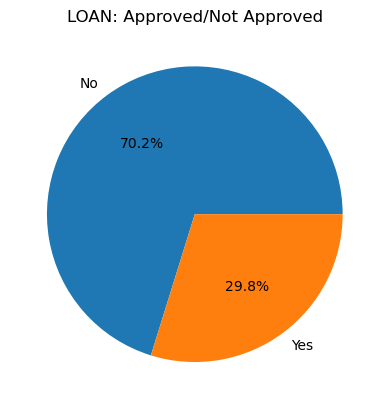

In [27]:
# Checking How Balanced Our Classes Are?
classes_count = df["Loan_Approved"].value_counts()

plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("LOAN: Approved/Not Approved")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Male'),
  Text(1, 0, 'Female'),
  Text(2, 0, 'Graduate'),
  Text(3, 0, 'Not Graduate'),
  Text(4, 0, 'Salaried'),
  Text(5, 0, 'Contract'),
  Text(6, 0, 'Self-employed'),
  Text(7, 0, 'Unemployed')])

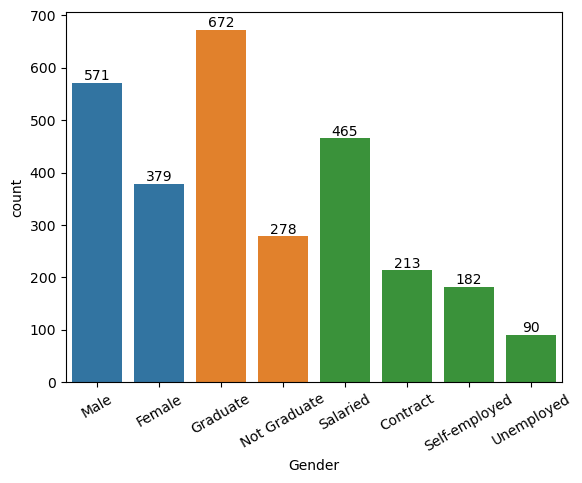

In [41]:
# Analysing Catgories:

gender_count = df["Gender"].value_counts()

ax = sns.barplot(gender_count)
ax.bar_label(ax.containers[0])



edu_count = df["Education_Level"].value_counts()

ax = sns.barplot(edu_count)
ax.bar_label(ax.containers[1])



emp_count = df["Employment_Status"].value_counts()

ax = sns.barplot(emp_count)
ax.bar_label(ax.containers[2])
plt.xticks(rotation=30)

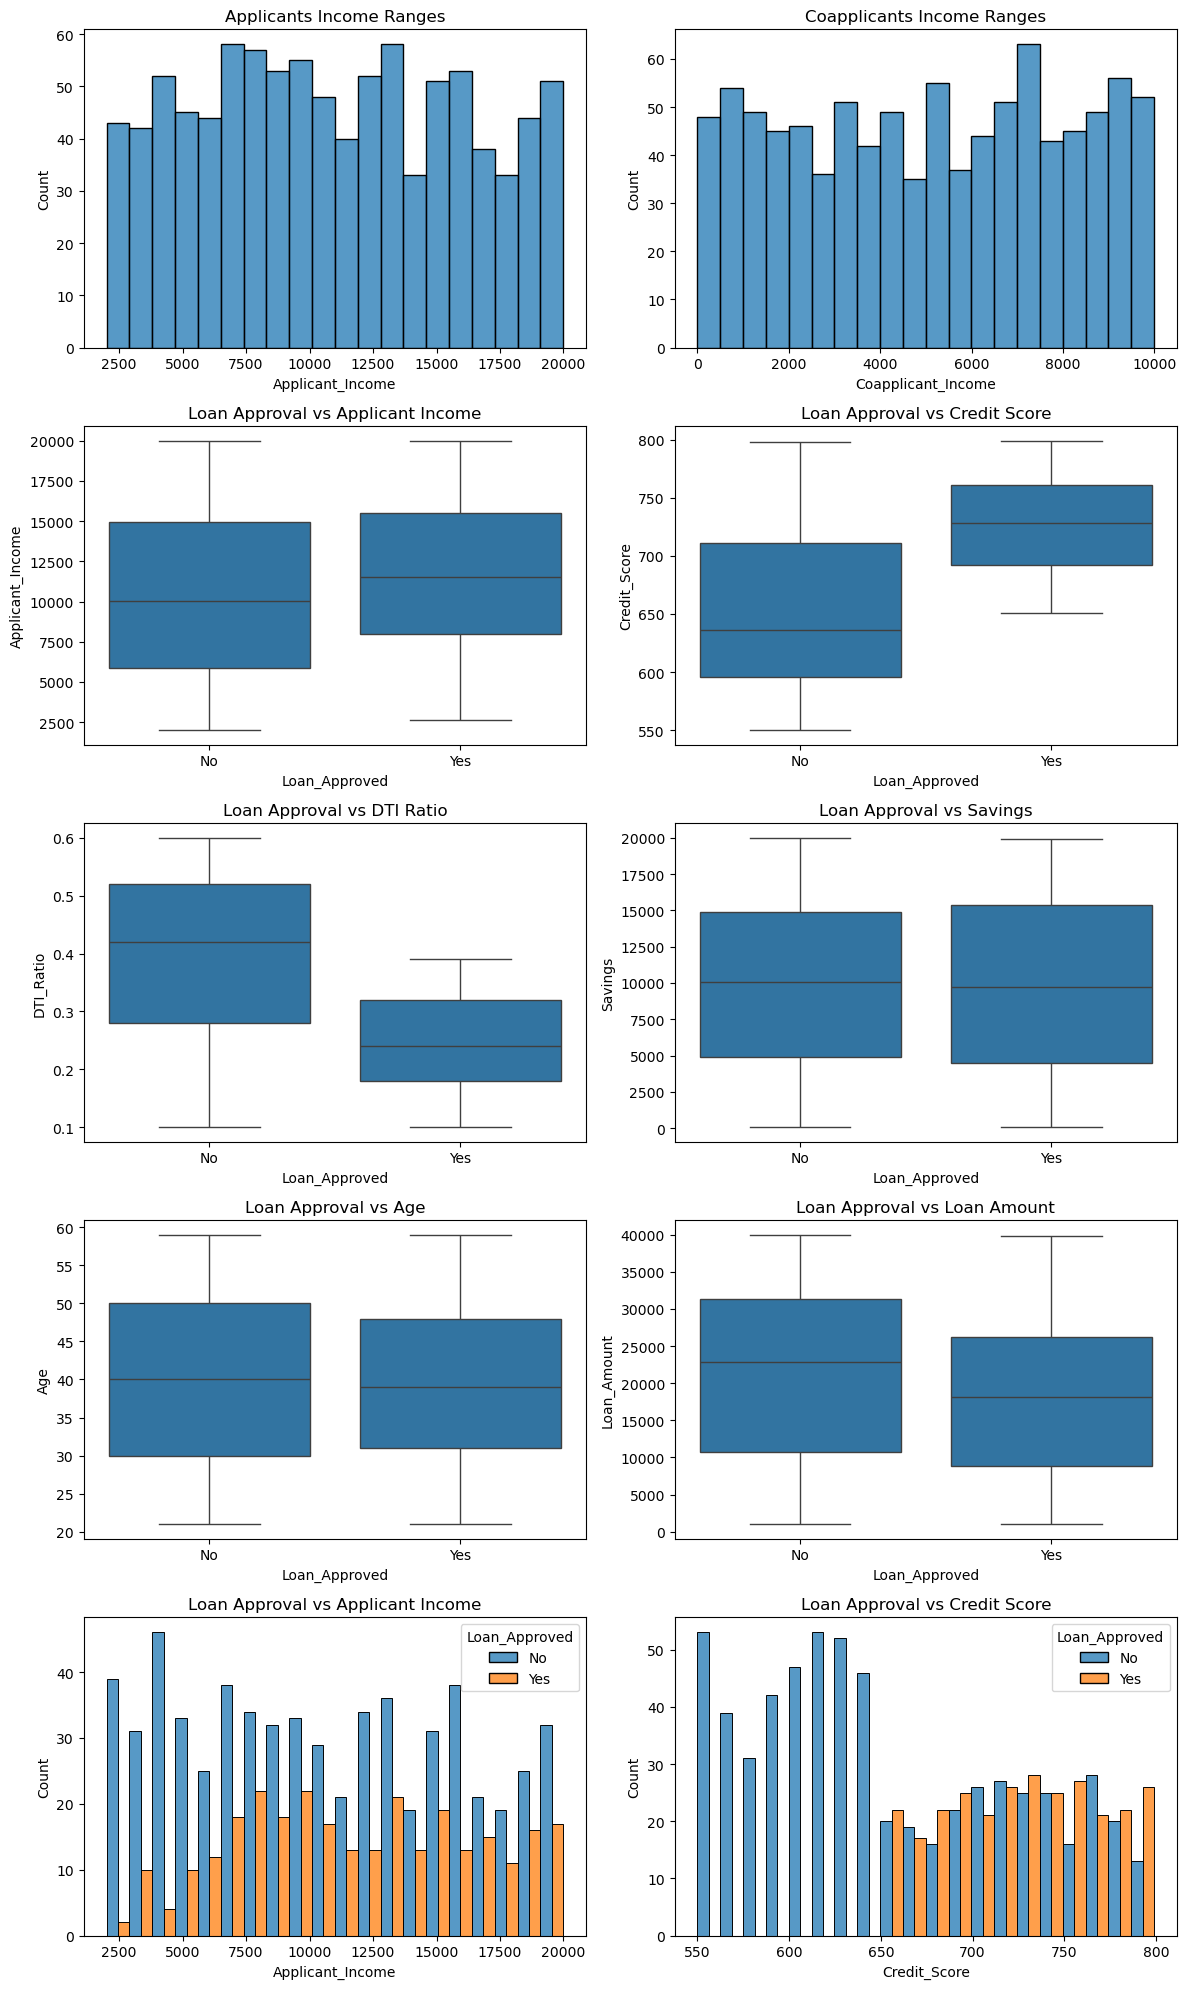

In [66]:
# Analyzing Income

fig, axes = plt.subplots(5, 2, figsize=(12, 20))

sns.histplot(
    data=df,
    x="Applicant_Income",
    bins=20,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Applicants Income Ranges")

sns.histplot(
    data=df,
    x="Coapplicant_Income",
    bins=20,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Coapplicants Income Ranges")

sns.histplot(
    data=df,
    x="Applicant_Income",
    hue="Loan_Approved",
    bins = 20,
    multiple="dodge",
    ax=axes[4, 0]
)
axes[4, 0].set_title("Loan Approval vs Applicant Income")


sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins = 20,
    multiple="dodge",
    ax=axes[4, 1]
)
axes[4, 1].set_title("Loan Approval vs Credit Score")


# Outliers Detection : Box Plot
sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Loan Approval vs Applicant Income")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Credit_Score",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Loan Approval vs Credit Score")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="DTI_Ratio",
    ax=axes[2, 0]
)
axes[2, 0].set_title("Loan Approval vs DTI Ratio")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Savings",
    ax=axes[2, 1]
)
axes[2, 1].set_title("Loan Approval vs Savings")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Age",
    ax=axes[3, 0]
)
axes[3, 0].set_title("Loan Approval vs Age")


sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Loan_Amount",
    ax=axes[3, 1]
)
axes[3, 1].set_title("Loan Approval vs Loan Amount")




plt.tight_layout()
plt.show()

In [67]:
# Removing Applicant_Id Column: Cause it is given by bank for
# unique identification of users 
# It is not relevent for model training

df = df.drop(columns=["Applicant_ID"])
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


# Feature Encoding